# Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Carregando DataFrame

In [ ]:
url='https://drive.google.com/file/d/1RvWYgF6ugC39ijDHca84NNoX-cQKOBYp/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


# Análise Exploratória dos Dados

In [ ]:
# Verificando o cabeçalho do dataset (primeiras 5 linhas)
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Verificando o rodapé do dataset (últimas 5 linhas)
df.tail()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Verificando o formato do dataset (número de linhas e colunas)
df.shape

(768, 8)

In [ ]:
# Verificando o tipo das features
df.dtypes

Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# Verificando se existem valores nulos
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Verificando se existem linhas duplicadas
df.duplicated().sum()

0

In [ ]:
# Descrição do dataframe
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Análise de correlação entre features
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Verificando a porcentagem (%) dos valores da coluna 'Resultado'
df['Outcome'].value_counts()/df.shape[0]

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
# Contando linhas por resultado para ver o mapeamento
df.groupby(['Outcome']).count()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268


## Plotando os gráficos das colunas com maior correlação com a coluna 'Resultado' 

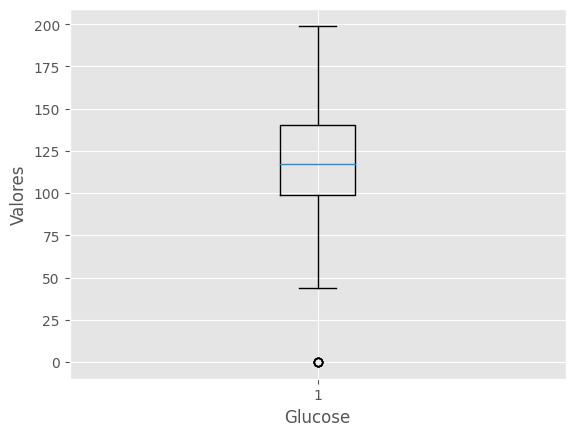

In [ ]:
plt.boxplot(df['Glucose'])
plt.ylabel('Valores')
plt.xlabel('Glucose')
plt.show()

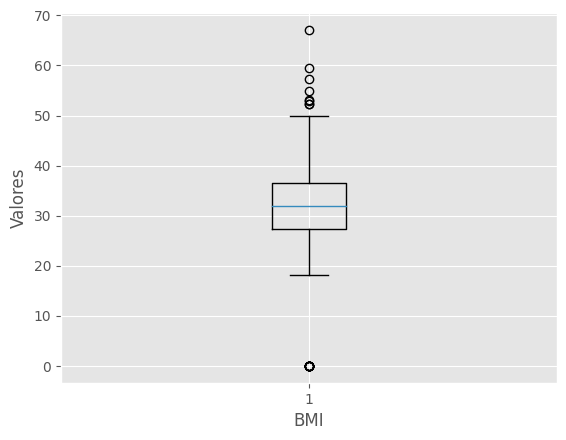

In [ ]:
plt.boxplot(df['BMI'])
plt.ylabel('Valores')
plt.xlabel('BMI')
plt.show()

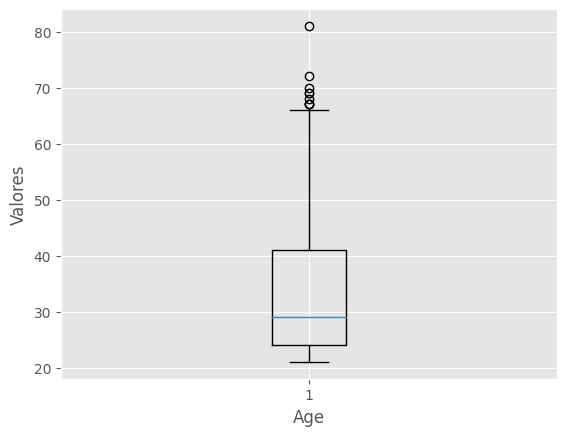

In [ ]:
plt.boxplot(df['Age'])
plt.ylabel('Valores')
plt.xlabel('Age')
plt.show()

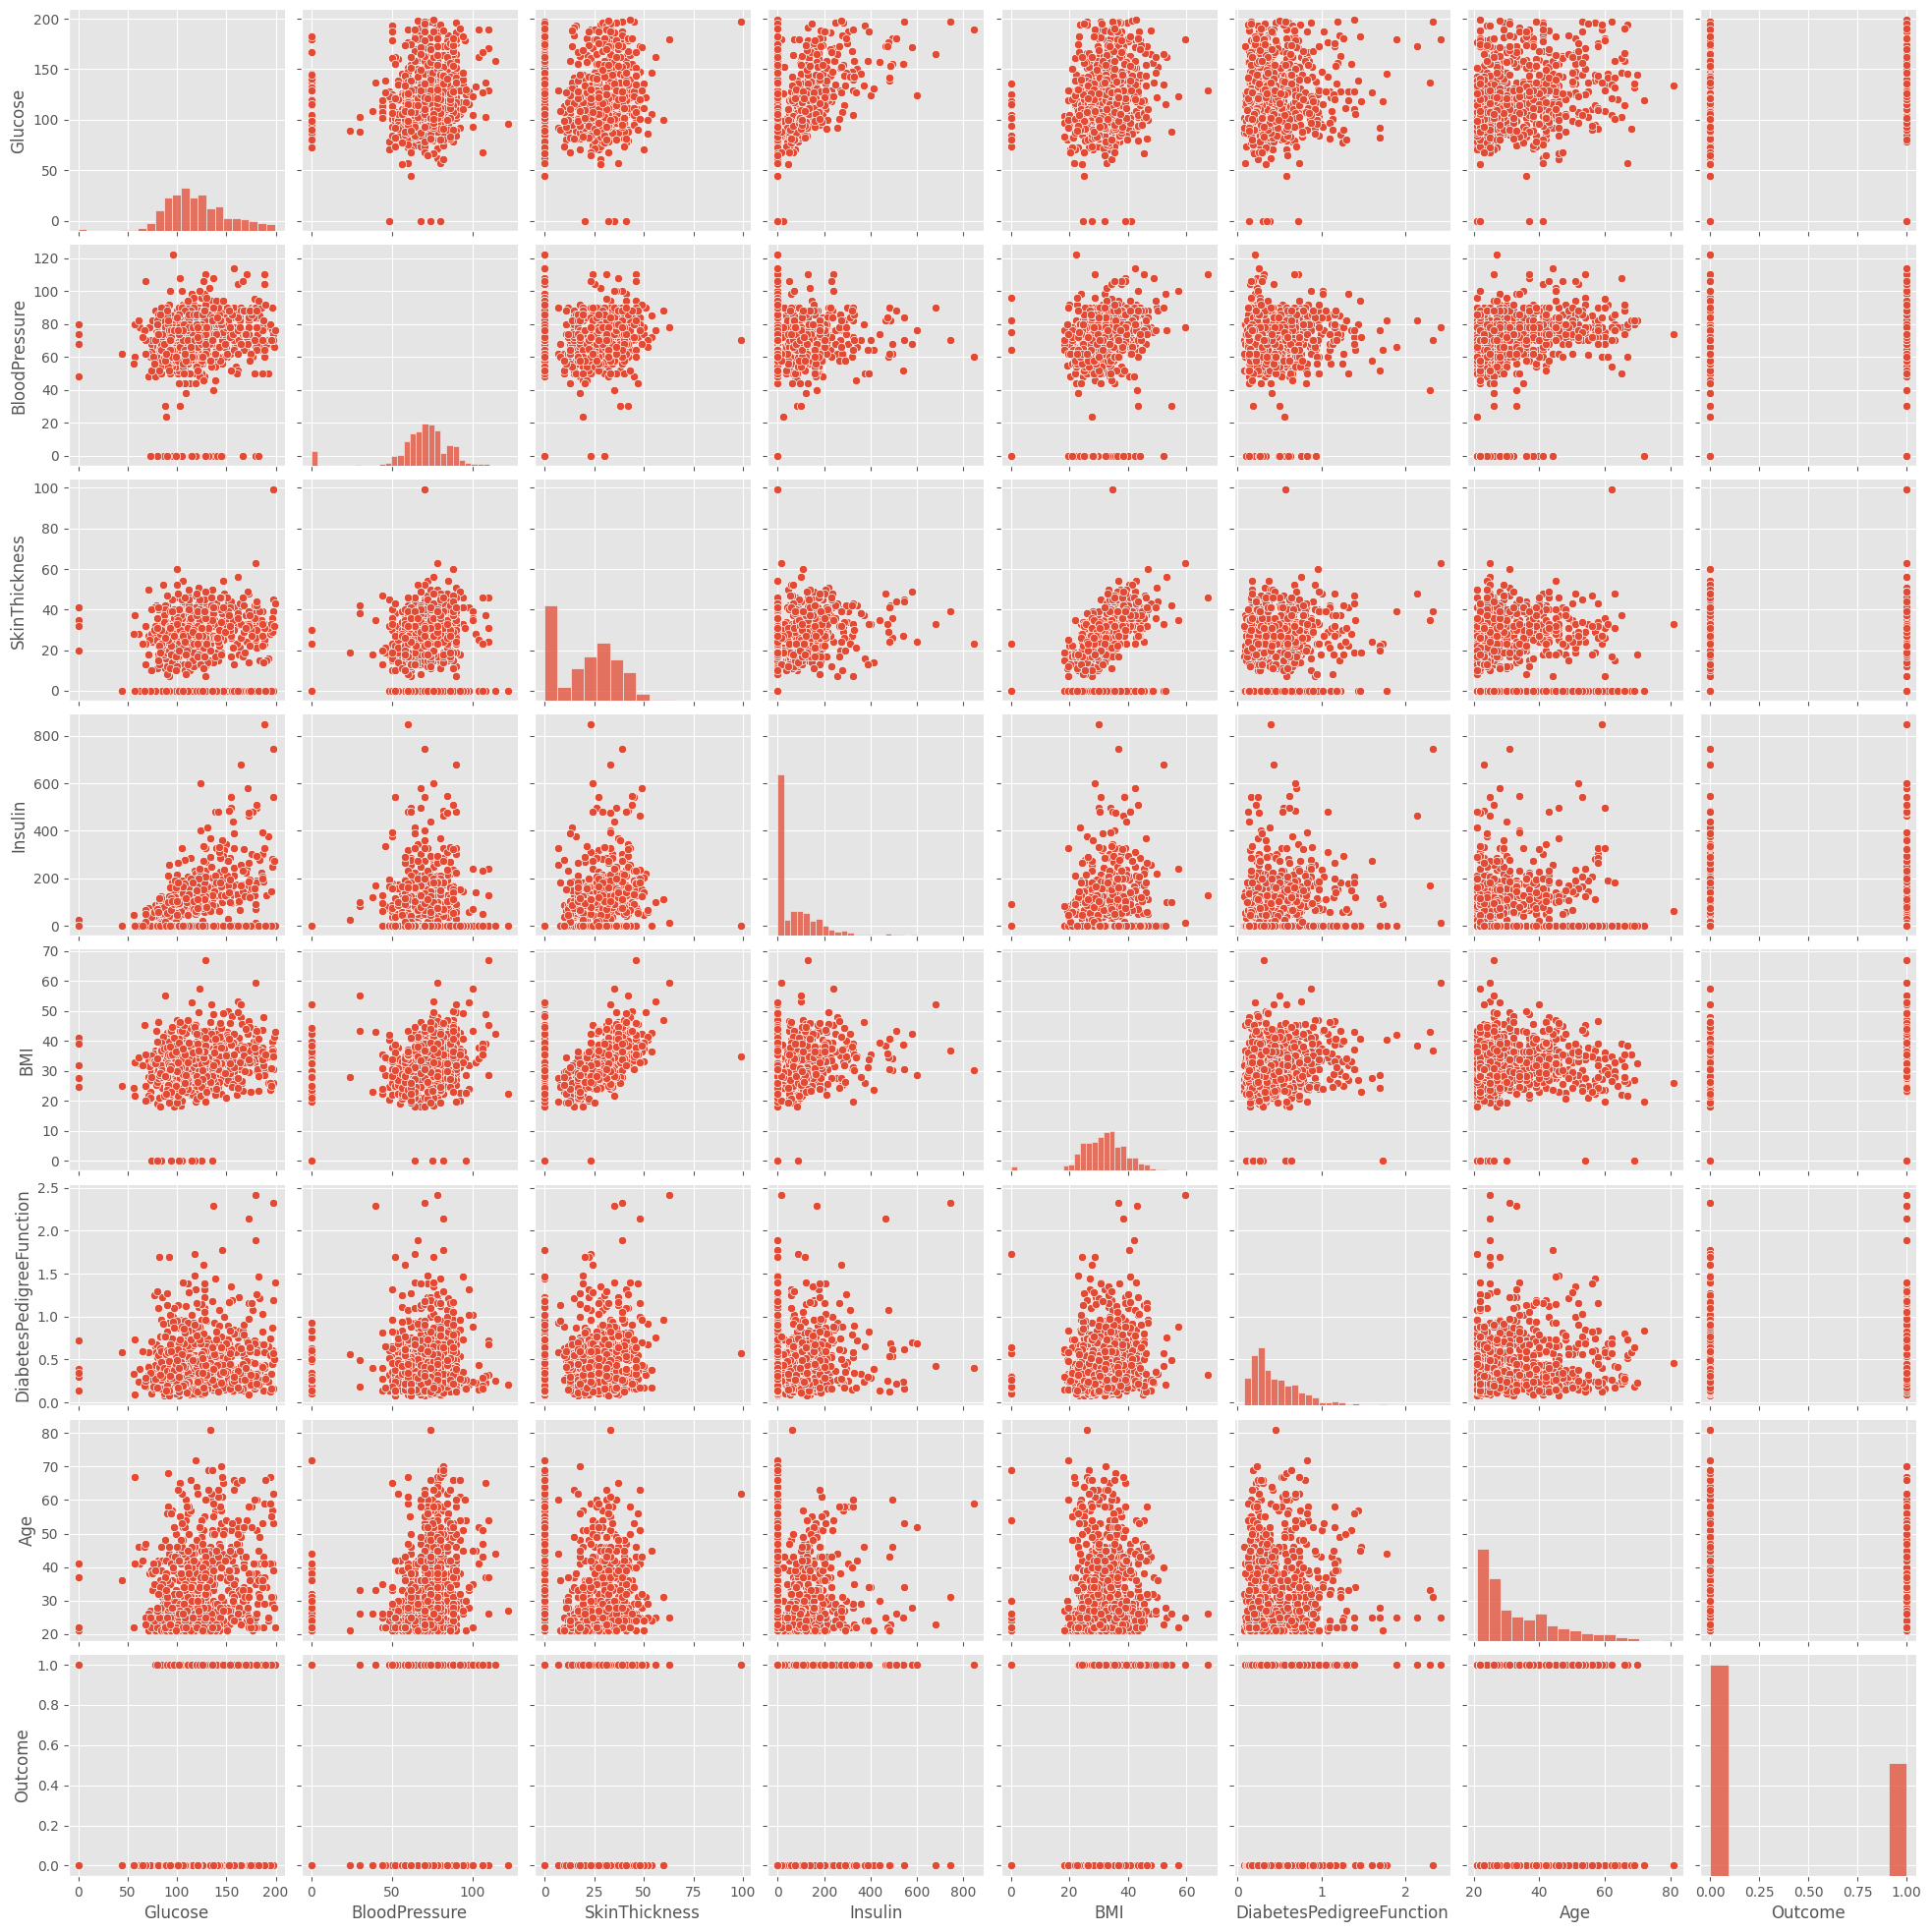

In [ ]:
# Plotando pairplot usando a biblioteca seaborn
sns.pairplot(df)

# Treinando o Modelo

In [ ]:
# Dividindo dataframe entre X e y
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [ ]:
# Dividindo dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Criando uma instância da classe SVC
svm_model = SVC()

In [ ]:
# Treinando o modelo com os dados de treino
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Fazendo previsões nos dados de teste
y_pred = svm_model.predict(X_test)

# Avaliando o Modelo

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[130,  21],
       [ 40,  40]])

In [ ]:
# Calculando a Acurácia do Modelo
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia: ',accuracy)

Acurácia:  0.7359307359307359


In [ ]:
# Calculando a Precisão do Modelo
precision = precision_score(y_test, y_pred, average='macro')
print('Precisão: ',precision)

Precisão:  0.7102217936354869


In [ ]:
# Calculando o Recall do Modelo
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: ',recall)

Recall:  0.6804635761589404


In [ ]:
# Calculando o F1-Score do Modelo
f1 = f1_score(y_test, y_pred, average='macro')
print('F1-Score: ',f1)

F1-Score:  0.6886723669384238
